In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# cd only once to the wanted dir at the beginning
%cd '/content/drive/MyDrive/Grad School/ECE219/HW2'

Mounted at /content/drive
/content/drive/MyDrive/Grad School/ECE219/HW2


# Helper Code

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

# Question 1

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
raw_train = fetch_20newsgroups(subset='train', categories=categories)
raw_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(min_df=3)
vectorized_train = vectorizer.fit_transform(raw_train.data)
vectorized_test = vectorizer.transform(raw_test.data)
print(vectorized_train.shape)
print(vectorized_test.shape)

(4732, 20589)
(3150, 20589)


# Question 2

<ipython-input-2-c9caf59fab00>:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


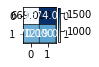

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(vectorized_train)

preds = kmeans.labels_
gt_labels = [0 if x < 4 else 1 for x in raw_train.target]
contingency = contingency_matrix(gt_labels, preds)
plot_mat(contingency)

# Question 3

In [5]:
from sklearn import metrics

def report(preds, labels):
  homog = metrics.homogeneity_score(labels, preds)
  compl = metrics.completeness_score(labels, preds)
  vmeas = metrics.v_measure_score(labels, preds)
  ari = metrics.adjusted_rand_score(labels, preds)
  ami = metrics.adjusted_mutual_info_score(labels, preds)

  print(f"Homogeneity: {homog}")
  print(f"Completeness: {compl}")
  print(f"V-Measure: {vmeas}")
  print(f"Adjusted Rand Index: {ari}")
  print(f"Adjusted Mutual Info: {ami}")

report(preds, gt_labels)

Homogeneity: 0.031959727528859776
Completeness: 0.033154074892616014
V-Measure: 0.032545947575930344
Adjusted Rand Index: 0.040618406830164905
Adjusted Mutual Info: 0.032395678929806646


# Question 4

In [25]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

svd = TruncatedSVD(n_components=1000).fit(vectorized_train)

Text(0, 0.5, '% Explained Variance')

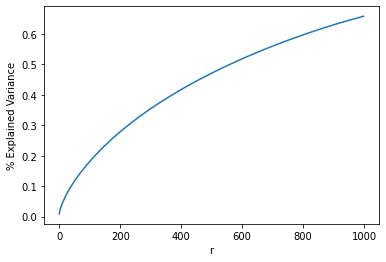

In [26]:
plt.plot(np.arange(1000), np.cumsum(svd.explained_variance_ratio_))
plt.xlabel("r")
plt.ylabel("% Explained Variance")

# Question 5

## SVD

In [27]:
reduced = TruncatedSVD(n_components=1000).fit_transform(vectorized_train)
print(reduced.shape)

(4732, 1000)


In [28]:
for k in [1,2,3,4,5,6,7,8,9,10,20,50,100,300]:
  kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced[...,:k])
  print(f"Report for K={k}")
  report(gt_labels, kmeans.labels_)
  print()

Report for K=1
Homogeneity: 0.012811287861286899
Completeness: 0.012571459080662066
V-Measure: 0.012690240460348258
Adjusted Rand Index: 0.016303957649594535
Adjusted Mutual Info: 0.01253822894904869

Report for K=2
Homogeneity: 0.11817302186847066
Completeness: 0.10876501601327326
V-Measure: 0.11327400849882004
Adjusted Rand Index: 0.1264733842316172
Adjusted Mutual Info: 0.11313314809176858

Report for K=3
Homogeneity: 0.04624150483040117
Completeness: 0.04408309919548781
V-Measure: 0.045136513276115425
Adjusted Rand Index: 0.05503037001924629
Adjusted Mutual Info: 0.04498739024980104

Report for K=4
Homogeneity: 0.048199756287531245
Completeness: 0.046215206961322836
V-Measure: 0.047186624570139085
Adjusted Rand Index: 0.05825423881648007
Adjusted Mutual Info: 0.04703824037608506

Report for K=5
Homogeneity: 0.04776670152603446
Completeness: 0.04535238978074085
V-Measure: 0.04652824755370872
Adjusted Rand Index: 0.05622948677000648
Adjusted Mutual Info: 0.04637904607601487

Report f

## NMF

In [ ]:
from sklearn.decomposition import NMF
for k in [1,2,3,4,5,6,7,8,9,10,20,50,100,300]:
  reduced = NMF(n_components=k).fit_transform(vectorized_train)
  kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced[...,:k])
  print(f"Report for K={k}")
  report(gt_labels, kmeans.labels_)
  print()

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=1
Homogeneity: 0.11642989771306712
Completeness: 0.025138480372592927
V-Measure: 0.04134921566554858
Adjusted Rand Index: 0.012666590848792316
Adjusted Mutual Info: 0.0409057550826749



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=2
Homogeneity: 0.23870856656184078
Completeness: 0.05017710031688087
V-Measure: 0.08292348886869996
Adjusted Rand Index: 0.022067500338853067
Adjusted Mutual Info: 0.08249723564846402



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=3
Homogeneity: 0.26811043775824794
Completeness: 0.05237622357175989
V-Measure: 0.08763305263109601
Adjusted Rand Index: 0.020768977639755246
Adjusted Mutual Info: 0.08720365211071032



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=4
Homogeneity: 0.2989758383831458
Completeness: 0.05938608328606993
V-Measure: 0.09908979143790143
Adjusted Rand Index: 0.023647943944658672
Adjusted Mutual Info: 0.09866695857816474



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=5
Homogeneity: 0.26529517030962985
Completeness: 0.05129818205747011
V-Measure: 0.08597249338154568
Adjusted Rand Index: 0.02020540344594575
Adjusted Mutual Info: 0.08554158369071073



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Report for K=6
Homogeneity: 0.25805168386432237
Completeness: 0.04875727764680297
V-Measure: 0.0820177972340065
Adjusted Rand Index: 0.018587231660584007
Adjusted Mutual Info: 0.08158339121513043



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Report for K=7
Homogeneity: 0.2934537560115733
Completeness: 0.054951071921936795
V-Measure: 0.09256816874783308
Adjusted Rand Index: 0.02075974753205176
Adjusted Mutual Info: 0.09213813580390565



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Report for K=8
Homogeneity: 0.26786395981912897
Completeness: 0.05496526927328321
V-Measure: 0.09121364085562222
Adjusted Rand Index: 0.02349027153890357
Adjusted Mutual Info: 0.09078946555089719



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=9
Homogeneity: 0.266747589475893
Completeness: 0.05456454633619454
V-Measure: 0.0905970212997975
Adjusted Rand Index: 0.023273245788810102
Adjusted Mutual Info: 0.09017232858025973



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=10
Homogeneity: 0.24912737290706885
Completeness: 0.05162427977515639
V-Measure: 0.08552585552833665
Adjusted Rand Index: 0.022405079837842432
Adjusted Mutual Info: 0.0850997492366235



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=20
Homogeneity: 0.22608752278435043
Completeness: 0.04697171762653046
V-Measure: 0.07778326243879131
Adjusted Rand Index: 0.02113046344686463
Adjusted Mutual Info: 0.07735374240085598



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=50
Homogeneity: 0.49212309962051654
Completeness: 0.006705316788264416
V-Measure: 0.013230366086738773
Adjusted Rand Index: 0.00012940277892119583
Adjusted Mutual Info: 0.012644361695370029



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Report for K=100
Homogeneity: 0.49212309962051654
Completeness: 0.006705316788264416
V-Measure: 0.013230366086738773
Adjusted Rand Index: 0.00012940277892119583
Adjusted Mutual Info: 0.012644361695370027



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


# Question 8

## PCA

Text(0.5, 1.0, 'Clustering Visualization with GT Labels')

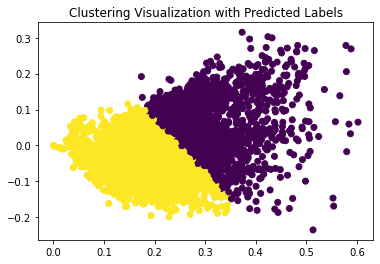

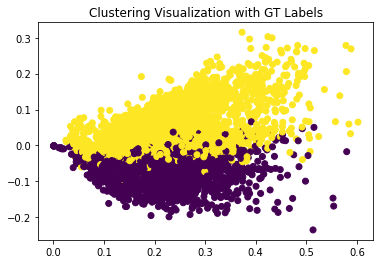

In [30]:
import matplotlib.pyplot as plt

reduced = TruncatedSVD(n_components=2).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced)
preds = kmeans.labels_
gt_labels = [0 if x < 4 else 1 for x in raw_train.target]

plt.scatter(reduced[...,0], reduced[...,1], c=preds)
plt.title("Clustering Visualization with Predicted Labels")
plt.figure()
plt.scatter(reduced[...,0], reduced[...,1], c=gt_labels)
plt.title("Clustering Visualization with GT Labels")

## NMF

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0.5, 1.0, 'Clustering Visualization with GT Labels')

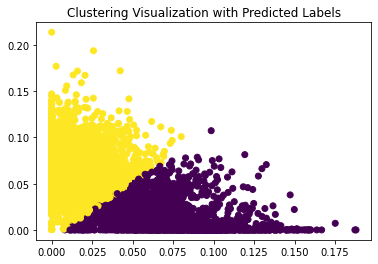

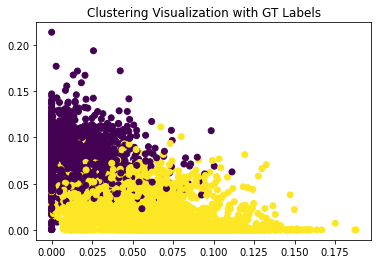

In [32]:
from sklearn.decomposition import NMF

reduced = NMF(n_components=2).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced)
preds = kmeans.labels_
gt_labels = [0 if x < 4 else 1 for x in raw_train.target]

plt.scatter(reduced[...,0], reduced[...,1], c=preds)
plt.title("Clustering Visualization with Predicted Labels")
plt.figure()
plt.scatter(reduced[...,0], reduced[...,1], c=gt_labels)
plt.title("Clustering Visualization with GT Labels")

# Question 10

In [6]:
raw_train = fetch_20newsgroups(subset='train')
raw_test = fetch_20newsgroups(subset='test')

vectorizer = TfidfVectorizer(min_df=3)
vectorized_train = vectorizer.fit_transform(raw_train.data)
vectorized_test = vectorizer.transform(raw_test.data)
print(vectorized_train.shape)
print(vectorized_test.shape)

(11314, 38869)
(7532, 38869)


## SVD

In [33]:
reduced = TruncatedSVD(n_components=450).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, raw_train.target)

Homogeneity: 0.2900235116650489
Completeness: 0.2571036311244157
V-Measure: 0.27257319964193977
Adjusted Rand Index: 0.11183674895039024
Adjusted Mutual Info: 0.26773927004276754


## NMF

In [35]:
reduced = NMF(n_components=2).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, raw_train.target)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Homogeneity: 0.283461115779993
Completeness: 0.20409024618144744
V-Measure: 0.23731509504831177
Adjusted Rand Index: 0.08715376969193184
Adjusted Mutual Info: 0.23293287517628514


# Question 11

In [7]:
!pip install umap-learn
import umap.umap_ as umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
for metric in ['cosine', 'euclidean']:
  for k in [5, 20, 200]:
    reducer = umap.UMAP(metric=metric, n_components=k)
    reduced = reducer.fit_transform(vectorized_train)

    kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(reduced)

    print(f"Metric: {metric}, n_components: {k}")
    report(kmeans.labels_, raw_train.target)

Metric: cosine, n_components: 5
Homogeneity: 0.49836886639890904
Completeness: 0.3572595132663098
V-Measure: 0.4161783850751214
Adjusted Rand Index: 0.28623793116336843
Adjusted Mutual Info: 0.4128334468101166
Metric: cosine, n_components: 20
Homogeneity: 0.4977457508244255
Completeness: 0.36200890075405817
V-Measure: 0.4191623547023169
Adjusted Rand Index: 0.2984865088148811
Adjusted Mutual Info: 0.41580282250904754
Metric: cosine, n_components: 200
Homogeneity: 0.5070626820320292
Completeness: 0.3792104509288692
V-Measure: 0.4339146954848534
Adjusted Rand Index: 0.344246767796284
Adjusted Mutual Info: 0.43055417798299406
Metric: euclidean, n_components: 5
Homogeneity: 0.5154048417806837
Completeness: 0.3805314764111318
V-Measure: 0.437816307721682
Adjusted Rand Index: 0.3475073938575974
Adjusted Mutual Info: 0.4345060071044367
Metric: euclidean, n_components: 20
Homogeneity: 0.523301150681635
Completeness: 0.3875505044749231
V-Measure: 0.44530988946628625
Adjusted Rand Index: 0.33282

# Question 14

## Ward Linkage

In [11]:
from sklearn.cluster import AgglomerativeClustering
reducer = umap.UMAP(metric='euclidean', n_components=20)
reduced = reducer.fit_transform(vectorized_train)

agg_cluster = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(reduced)
report(agg_cluster.labels_, raw_train.target)

Homogeneity: 0.49405661139421975
Completeness: 0.3763978060273877
V-Measure: 0.42727527337491533
Adjusted Rand Index: 0.35680167888759434
Adjusted Mutual Info: 0.4238088335579014


## Single Linkage

In [12]:
reducer = umap.UMAP(metric='euclidean', n_components=20)
reduced = reducer.fit_transform(vectorized_train)

agg_cluster = AgglomerativeClustering(n_clusters=20, linkage='single').fit(reduced)
report(agg_cluster.labels_, raw_train.target)

Homogeneity: 0.021623167509019606
Completeness: 0.18855358938590175
V-Measure: 0.038797114466435786
Adjusted Rand Index: 0.00022840199263828777
Adjusted Mutual Info: 0.026745294767300948


# Question 15

In [8]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from hdbscan import HDBSCAN

reducer = umap.UMAP(metric='euclidean', n_components=20)
reduced = reducer.fit_transform(vectorized_train)

for min_size in [20, 100, 200]:
  clusterer = HDBSCAN(min_cluster_size=min_size).fit(reduced)

  report(clusterer.labels_, raw_train.target)

Homogeneity: 0.34033072690787075
Completeness: 0.33330630101389985
V-Measure: 0.33678188996525066
Adjusted Rand Index: 0.14930007355193636
Adjusted Mutual Info: 0.3298052862782741
Homogeneity: 0.13002161081183017
Completeness: 0.2861160833934387
V-Measure: 0.17879309930350362
Adjusted Rand Index: 0.055951957901021046
Adjusted Mutual Info: 0.17798749606369157
Homogeneity: 0.1073016661894311
Completeness: 0.28560405279661655
V-Measure: 0.1559956460527848
Adjusted Rand Index: 0.034574594700247055
Adjusted Mutual Info: 0.15511970086493881


# Question 19

VGG can be a useful feature extractor even due to the domain gap between the training and validation datasets because the training dataset is large. It was likely trained on the ImageNet dataset which contains millions of images. Even though the classes are different than the flowers dataset, it likely learned to extract features for general images due to the large size of the training dataset.

# Question 20

The helper code performs feature extraction by using the Autoencoder to reconstruct the input dataset. The loss used to train the network is the reconstruction error (MSE) between the output and input images in a batch. Once the network is trained, the feature vectors are extracted from the narrowest part of the U-net architecture (eg. the output of the encoder).

# Question 21

All images in the dataset have a resolution of 224x224. The feature vectors are of dimension 4096

# Question 22

In [9]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [10]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

In [11]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

(3670, 4096) (3670,)


In [12]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                ##################################
                # you should implement this part #
                ##################################
                raise NotImplementedError
        return self
    
    def eval(self, X_test, y_test):
        ##################################
        # you should implement this part #
        ##################################
        raise NotImplementedError

In [13]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

100%|██████████| 100/100 [00:32<00:00,  3.08it/s]


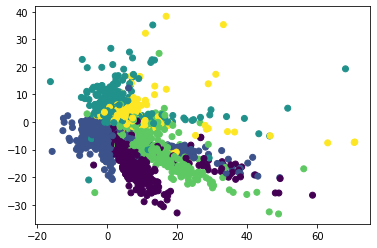

In [14]:
X_em =Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)

In [15]:
print(vectorized_train.shape)
print(f_all.shape)

# print(np.sum(vectorized_train == 0.0) / (11314*38869))
print(np.sum(f_all <= 1e-5) / (3670*4096))

(11314, 38869)
(3670, 4096)
0.7160752964279632


About 71% of values are close to zero, so the features are sparse.

# Question 24

## No Dim Red

In [18]:
from sklearn.cluster import AgglomerativeClustering
from hdbscan import HDBSCAN

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(f_all)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(f_all)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(f_all)
report(clusterer.labels_, y_all)

K means
Homogeneity: 0.32625500139012326
Completeness: 0.36062496746782624
V-Measure: 0.3425800855953062
Adjusted Rand Index: 0.19330907774727044
Adjusted Mutual Info: 0.34163621996164256
Agglomerative Clustering
Homogeneity: 0.357423727296284
Completeness: 0.41402546658906453
V-Measure: 0.3836481433561248
Adjusted Rand Index: 0.18855278251971858
Adjusted Mutual Info: 0.3827433388813023
HDBSCAN
Homogeneity: 1.3876720518042915e-16
Completeness: 1.0
V-Measure: 2.7753441036085825e-16
Adjusted Rand Index: 0.0
Adjusted Mutual Info: 5.0062065300172974e-17


## SVD

In [20]:
from sklearn.decomposition import TruncatedSVD

reduced = TruncatedSVD(n_components=50).fit_transform(f_all)

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(reduced)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(reduced)
report(clusterer.labels_, y_all)

K means
Homogeneity: 0.3244827352596559
Completeness: 0.3593829561409272
V-Measure: 0.34104230137786257
Adjusted Rand Index: 0.18965257345555342
Adjusted Mutual Info: 0.3400953275418203
Agglomerative Clustering
Homogeneity: 0.3079101013140291
Completeness: 0.362235509549504
V-Measure: 0.33287085862191723
Adjusted Rand Index: 0.14488388237459995
Adjusted Mutual Info: 0.3318844652680616
HDBSCAN
Homogeneity: 1.3876720518042915e-16
Completeness: 1.0
V-Measure: 2.7753441036085825e-16
Adjusted Rand Index: 0.0
Adjusted Mutual Info: 5.0062065300172974e-17


## UMAP

In [ ]:
reducer = umap.UMAP(metric='cosine', n_components=50)
reduced = reducer.fit_transform(f_all)

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(reduced)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(reduced)
report(clusterer.labels_, y_all)

## Autoencoder

In [ ]:
reduced =Autoencoder(50).fit_transform(f_all)

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(reduced)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(reduced)
report(clusterer.labels_, y_all)

# Question 25